<a href="https://colab.research.google.com/github/okanbuyuktepe/NLP-in-Tensorflow/blob/master/bbc_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence  import pad_sequences

In [36]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv

--2020-06-15 17:52:39--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.128, 2607:f8b0:400c:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [application/octet-stream]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  --.-KB/s    in 0.03s   

2020-06-15 17:52:39 (178 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



In [0]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = 0.8

In [38]:
sentences = []
labels = []
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print(len(stopwords))

153


In [39]:
with open("/tmp/bbc-text.csv", 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  for row in reader:
    labels.append(row[0])
    sentence = row[1]
    for word in stopwords:
      token = " "+word+" "
      sentence = sentence.replace(token, " ")
      sentence = sentence.replace("  ", " ")
    sentences.append(sentence)

print(len(labels))
print(len(sentences))
print(sentences[0])
print(labels[0])

2225
2225
tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv will radically different five years time. according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend programmes content will delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices. one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes like us s tivo uk s sky+ system allow people record store play pause forward wind tv programmes want. essentially technology allows much personalised tv. also built-in high-definition tv sets big business japan us slower take off europe lack high-definition programming. not can people forward wind adverts can also forget abiding network channel schedules putting together a-la-carte entertainment. us networks cab

In [40]:
train_size = int(len(sentences)* training_portion)
train_sentences = sentences[:train_size]
train_labels    = labels[:train_size]

validation_sentences = sentences[train_size:]
validation_labels    = labels[train_size:]

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

1780
1780
1780
445
445


In [48]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding= padding_type, maxlen= max_length)

print(word_index)
print(train_sentences[10])
print(train_sequences[10])
print(train_padded[10])

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))


{'<OOV>': 1, 's': 2, 'said': 3, 'will': 4, 'not': 5, 'mr': 6, 'year': 7, 'also': 8, 'people': 9, 'new': 10, 'us': 11, 'one': 12, 'can': 13, 'last': 14, 't': 15, 'first': 16, 'time': 17, 'two': 18, 'government': 19, 'world': 20, 'now': 21, 'uk': 22, 'best': 23, 'years': 24, 'no': 25, 'make': 26, 'just': 27, 'film': 28, 'told': 29, 'made': 30, 'get': 31, 'music': 32, 'game': 33, 'like': 34, 'back': 35, 'many': 36, '000': 37, 'labour': 38, 'three': 39, 'well': 40, '1': 41, 'next': 42, 'bbc': 43, 'take': 44, 'set': 45, 'number': 46, 'added': 47, 'way': 48, 'market': 49, '2': 50, 'company': 51, 'may': 52, 'says': 53, 'election': 54, 'home': 55, 'off': 56, 'party': 57, 'good': 58, 'going': 59, 'much': 60, 'work': 61, '2004': 62, 'still': 63, 'win': 64, 'show': 65, 'think': 66, 'games': 67, 'go': 68, 'top': 69, 'second': 70, 'won': 71, 'million': 72, '6': 73, 'england': 74, 'firm': 75, 'since': 76, 'week': 77, 'say': 78, 'play': 79, 'part': 80, 'public': 81, 'use': 82, 'blair': 83, '3': 84, '

In [49]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded    = pad_sequences(validation_sequences, padding= padding_type, maxlen= max_length)

print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 120)


In [50]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

print(label_tokenizer.word_index)

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

{'sport': 1, 'business': 2, 'politics': 3, 'tech': 4, 'entertainment': 5}
[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 150       
Total params: 16,558
Trainable params: 16,558
Non-trainable params: 0
_________________________________________________________________


In [24]:
num_epochs = 30
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/30
56/56 - 0s - loss: 1.7565 - accuracy: 0.1927 - val_loss: 1.7181 - val_accuracy: 0.1933
Epoch 2/30
56/56 - 0s - loss: 1.6728 - accuracy: 0.2112 - val_loss: 1.6265 - val_accuracy: 0.3101
Epoch 3/30
56/56 - 0s - loss: 1.5734 - accuracy: 0.4944 - val_loss: 1.5181 - val_accuracy: 0.6135
Epoch 4/30
56/56 - 0s - loss: 1.4434 - accuracy: 0.7421 - val_loss: 1.3677 - val_accuracy: 0.7573
Epoch 5/30
56/56 - 0s - loss: 1.2623 - accuracy: 0.8152 - val_loss: 1.1724 - val_accuracy: 0.8090
Epoch 6/30
56/56 - 0s - loss: 1.0391 - accuracy: 0.8674 - val_loss: 0.9572 - val_accuracy: 0.8652
Epoch 7/30
56/56 - 0s - loss: 0.8229 - accuracy: 0.9056 - val_loss: 0.7721 - val_accuracy: 0.8876
Epoch 8/30
56/56 - 0s - loss: 0.6438 - accuracy: 0.9208 - val_loss: 0.6295 - val_accuracy: 0.8899
Epoch 9/30
56/56 - 0s - loss: 0.5110 - accuracy: 0.9309 - val_loss: 0.5249 - val_accuracy: 0.8966
Epoch 10/30
56/56 - 0s - loss: 0.4144 - accuracy: 0.9393 - val_loss: 0.4525 - val_accuracy: 0.9056
Epoch 11/30
56/56 -

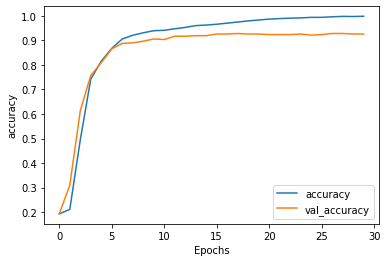

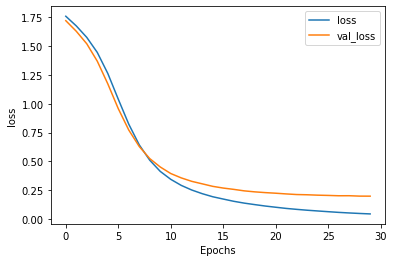

In [26]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [0]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [29]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(1000, 16)


In [0]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [0]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')